<a name="stage_1"></a>
# Шаг 1. Описание задачи

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Перед нами данные до 2016 года.

# <a name="contents">Задачи исследования — Сборный проект</a>

## [1. Описать и поставить цели задачи](#stage_1)



## [2. Откройте файл с данными и изучите общую информацию](#stage_2)
Путь к файлу:
- /data/games.csv

## [3. Проведите исследовательский анализ данных](#stage_3)
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Преобразуйте данные в нужные типы:
    - Опишите, в каких столбцах заменили тип данных и почему
    
- Обработайте пропуски при необходимости:
     - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
     - Опишите причины, которые могли привести к пропускам;
     - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
    

## [4. Проведите исследовательский анализ данных](#stage_4)
- Посмотрите, сколько игр выпускалось в разные годы.
- Посмотрите, как менялись продажи по платформам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле
- Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
- Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.
- Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Опишите результат.
- Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.
- Постройте общее распределение игр по жанрам

## [5. Составьте портрет пользователя каждого региона](#stage_5)
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


## [6. Проведите исследование статистических показателей](#stage_6)
Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

## [7. Проведите исследование статистических показателей](#stage_7)
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
- Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

## [8. Напишите общий вывод](#stage_8)
- Общие выводы

Таблица состоит из следующих стобцов:

*Name* — название игры <br />
*Platform* — платформа <br />
*Year_of_Release* — год выпуска <br />
*Genre* — жанр игры <br />
*NA_sales* — продажи в Северной Америке (миллионы долларов) <br />
*EU_sales* — продажи в Европе (миллионы долларов) <br />
*JP_sales* — продажи в Японии (миллионы долларов) <br />
*Other_sales* — продажи в других странах (миллионы долларов) <br />
*Critic_Score* — оценка критиков (от 0 до 100) <br />
*User_Score* — оценка пользователей (от 0 до 10) <br />
*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. <br />

<a name="stage_2"></a>
# Шаг 2. Открытие файла с данными, изучение общей информации

Используемые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('data/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы df.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В таблице 12 столбцов и 16715 строчек. Медиана года выпуска равна 2006, а самый первый год, имеющий данные о играх, это 1980 год  

<a name="stage_3"></a>
# Шаг 3. Подготовка данных

Приводим названия столбцов к нижнему регистру

In [5]:
df.columns = [column.lower() for column in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим значение 'tbd' в столбце user_score пустым значением и приведём этот столбец в численный тип float

In [7]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.1+ MB


Ищем номера строк с пустыми значениями в столбце name

In [8]:
index = df['name'].index[df['name'].apply(pd.isna)]
print(df.loc[index[0]])
print(df.loc[index[1]])

name                NaN
platform            GEN
year_of_release    1993
genre               NaN
na_sales           1.78
eu_sales           0.53
jp_sales              0
other_sales        0.08
critic_score        NaN
user_score          NaN
rating              NaN
Name: 659, dtype: object
name                NaN
platform            GEN
year_of_release    1993
genre               NaN
na_sales              0
eu_sales              0
jp_sales           0.03
other_sales           0
critic_score        NaN
user_score          NaN
rating              NaN
Name: 14244, dtype: object


Как видим, у двух игр без названия неизвестны жанры и оценки, поэтому удалим их из таблиц

In [9]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.3+ MB


Найдём дубликаты по столбцам name и platform одноврменно

In [10]:
df[df[['name', 'platform']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Удалим игры с индексом 4127 и 16230. А к двум играм Need for Speed: Most Wanted добавим к названию год её релиза

In [11]:
df.drop([4127,16230], inplace = True)
df.loc[1190, 'name'] = 'Need for Speed: Most Wanted 2012'
df.loc[11715, 'name'] = 'Need for Speed: Most Wanted 2012'

Возможно, что некоторые платформы не имеют года выпуска, но такая же игра на другой платформе имеет год выпуска

In [12]:
df[df['year_of_release'].isnull()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [13]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Только для определённой платформы не имеем значение года. Вставим значение года в платформах, где отсутствуют данные о годе выпуска с помощью других платформ, которые имеют эти данные 

In [14]:
for_df = df[df['year_of_release'].isnull()].iterrows()
li = []
for i in for_df:
    row = df[df['name'] == i[1][0]]
    l = list(row[row['year_of_release'].notnull()]['year_of_release'].unique())
    if l:
        df.iloc[i[0], 2] = l[0]

In [15]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Заменим пропуски в стобце год выпуска на -1 и приведём стобец к целочисленному виду

In [16]:
df['year_of_release'] = df['year_of_release'].fillna(-1)
df['year_of_release'] = df['year_of_release'].astype('int')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
name               16711 non-null object
platform           16711 non-null object
year_of_release    16711 non-null int32
genre              16711 non-null object
na_sales           16711 non-null float64
eu_sales           16711 non-null float64
jp_sales           16711 non-null float64
other_sales        16711 non-null float64
critic_score       8135 non-null float64
user_score         7588 non-null float64
rating             9947 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.7+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [18]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Узнаем, есть ли линейная свзяь между значениями user_score и critic_score

In [19]:
df['user_score'].corr(df['critic_score'])

0.5808724601570318

Корреляция в 0,58 говорит о наличии связи, однако не слишком сильной. Но, если обратить внимание на данные, то можно заметить, что пропуски бывают одновременно и в critic_score и в user_score. Поэтому для некоторых пар этих значений  можно поставить значение critic_score, если есть только оно в user_score и наоборот. Но этого делать не будем, т.к. в дальнейшем нам надо будет провести анализ зависимости выручки от оценок критиков и пользователей. Поэтому заполнение пропусков таким образом может исказить результаты будущего анализа

Посмотрим, сколько осталось пропусков

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
name               16711 non-null object
platform           16711 non-null object
year_of_release    16711 non-null int32
genre              16711 non-null object
na_sales           16711 non-null float64
eu_sales           16711 non-null float64
jp_sales           16711 non-null float64
other_sales        16711 non-null float64
critic_score       8135 non-null float64
user_score         7588 non-null float64
rating             9947 non-null object
all_sales          16711 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.8+ MB


Пропуски остались в оценках критиков и пользователей, а также в возрастном рейтинге. Это связано, что игры могли быть не популярными в годы прошлого века и соответсвенно их просто не оценили критики

Обновим индексы

In [21]:
df.reset_index(drop = True, inplace = True)

Данные подготовлены к дальнейшему анализу

<a name="stage_4"></a>
# Шаг 4. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

Text(0, 0.5, 'Количество игр за год')

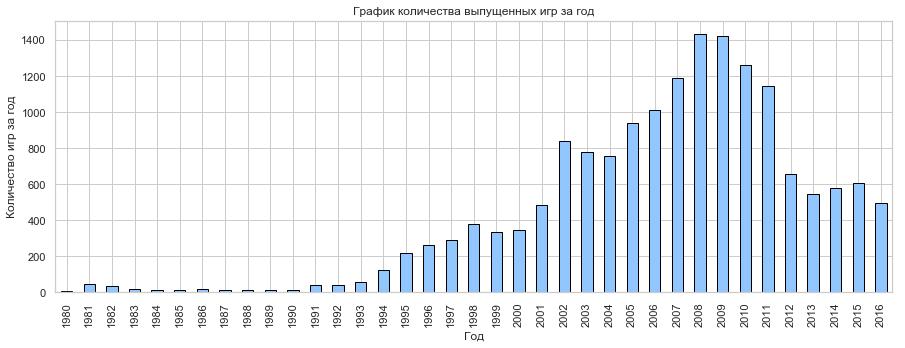

In [22]:
sns.set(style="whitegrid")
plt.style.use('seaborn-pastel')
figsize = (15,5)
plot = df[df['year_of_release'] > 0].groupby('year_of_release')['name'].count().plot(kind='bar', y='name', figsize=figsize, ec='black',  title='График количества выпущенных игр за год')
plot.set_xlabel("Год")
plot.set_ylabel("Количество игр за год")

Видим, что пик был в 2008 году, потом пошёл спад. Это связано развитием онлайн-игр и игр для мобильных устройств

Посмотрим, оценивали ли в разные года игры

Text(0, 0.5, 'Количество оценок критиков за год')

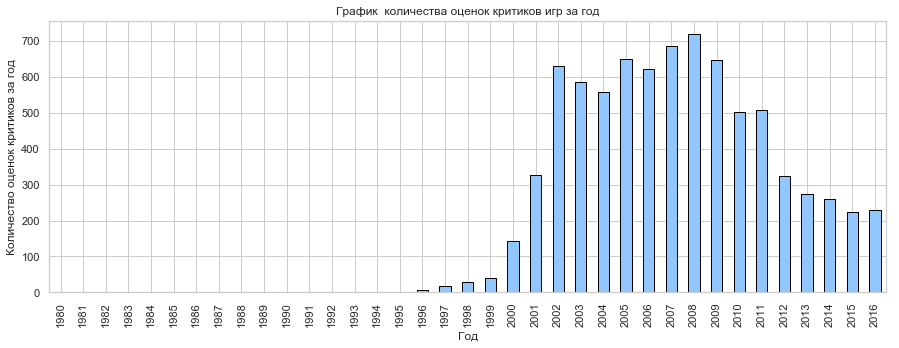

In [23]:
figsize = (15,5)
plot = df[df['year_of_release'] > 0].groupby('year_of_release')['critic_score'].count().plot(kind='bar', y='name', figsize=figsize, ec='black',  title='График  количества оценок критиков игр за год')
plot.set_xlabel("Год")
plot.set_ylabel("Количество оценок критиков за год")

Видим, что игры основательно начали оценивать только с 1996 года. Поэтому оставим данные игр, начиная с этого года. Соответственно игры с пустым значением года учитываться не будут

In [24]:
df = df.query('year_of_release > 1995')
print(sorted(df['year_of_release'].unique()))
df.reset_index(drop = True, inplace = True)

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


Выведем распределение общих продаж от года и платформы

In [25]:
pd.set_option('display.max_rows', None) # Вывести неограниченное число строк
platform_year = df.pivot_table(index=['year_of_release','platform'], values='all_sales', aggfunc = 'sum')
platform_year

all_sales
year_of_release platform           
1996            GB            36.03
                N64           34.10
                NG             0.10
                PC            10.58
                PCFX           0.03
                PS            94.65
                SAT            7.69
                SNES          15.92
1997            GB             6.37
                N64           39.50
                PC            11.27
                PS           136.04
                SAT            6.77
                SNES           0.99
1998            DC             3.38
                GB            26.90
                N64           49.24
                PC             3.26
                PS           169.15
                PS2            0.96
                SAT            3.82
                SNES           0.22
1999            DC             5.16
                GB            38.00
                GC             0.14
                N64           57.57
                PC             4.74
                PS           142.77
                SAT            0.09
                SNES           0.26
                WS             0.46
2000            DC             5.99
                DS             0.02
                GB            18.88
                GBA            0.07
                N64           33.80
                PC             4.66
                PS            96.37
                PS2           38.60
                WS             0.68
                XB             0.99
2001            DC             1.07
                GB             9.10
                GBA           61.26
                GC            26.34
                N64            3.25
                PC             5.47
                PS            35.59
                PS2          164.67
                PS3            1.20
                WS             0.28
                Wii            0.06
                XB            22.26
2002            DC             0.29
                DS             0.33
                GB             0.07
                GBA           73.27
                GC            52.03
                N64            0.25
                PC             8.57
                PS             6.67
                PS2          206.94
                SNES           0.21
                Wii            2.02
                XB            48.64
2003            3DS            0.04
                GBA           56.67
                GC            50.57
                PC             8.84
                PS             2.07
                PS2          192.37
                X360           0.02
                XB            55.04
2004            2600           0.54
                DS            16.68
                GBA           77.67
                GC            28.46
                PC            10.38
                PS2          210.74
                PS3            0.33
                PSP            7.06
                XB            65.42
2005            DS           131.07
                GBA           33.86
                GC            27.37
                PC             4.37
                PS2          159.25
                PSP           43.62
                Wii            0.67
                X360           8.52
                XB            46.81
2006            DS           119.87
                GB             0.18
                GBA            5.28
                GC            10.29
                PC             2.85
                PS2          102.83
                PS3           22.27
                PSP           55.32
                PSV            0.31
                Wii          137.15
                WiiU           2.23
                X360          52.00
                XB            10.03
2007            3DS            0.04
                DC             0.02
                DS           145.81
                GBA            3.40
                GC             0.23
                PC            

Выбираем 5 платформ с наибольшими суммарными продажами и строим для каждой успешной платформы график зависимости года к суммарным продажам

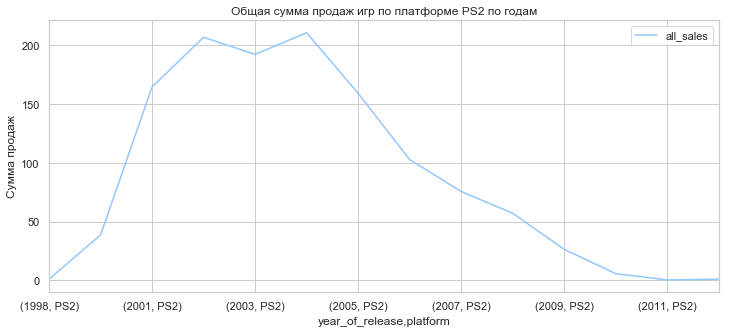

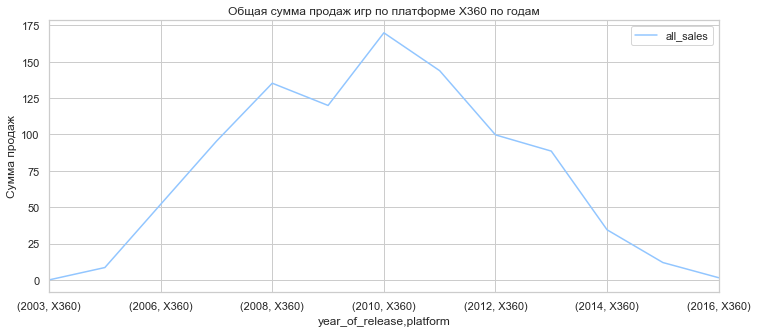

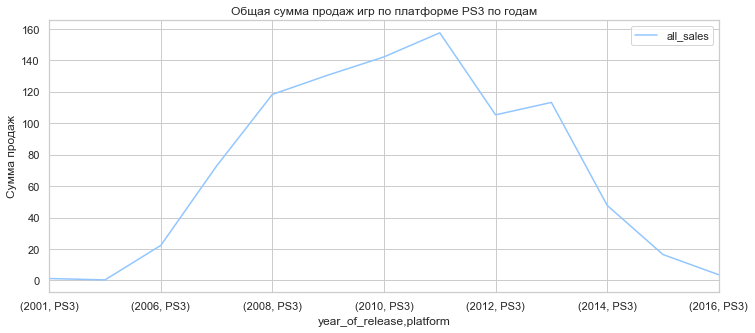

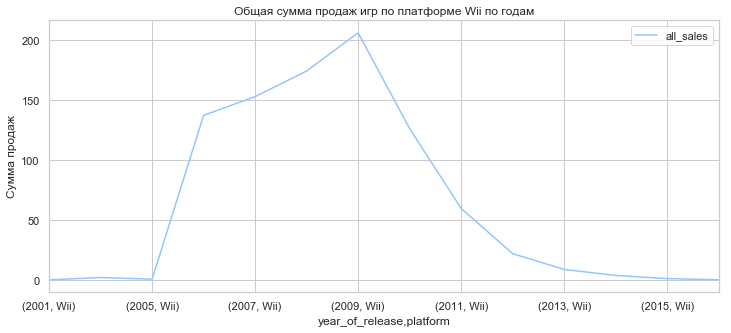

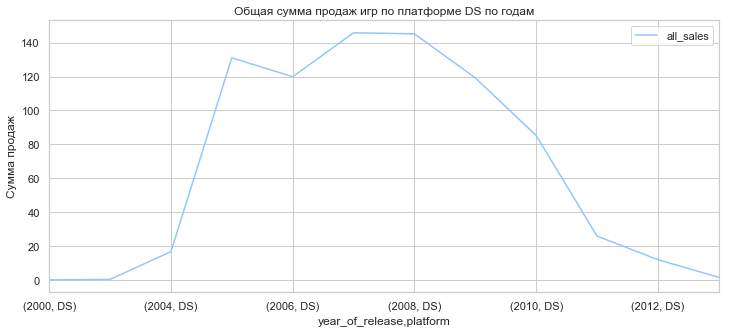

In [26]:
best_sales =df.groupby('platform')['all_sales'].sum().sort_values(ascending = False).head(5)
best_platform_year = platform_year.query('platform in @best_sales.index')
for platform in range(len(best_sales)):
    best_platform_year.filter(like=best_sales.index[platform], axis=0).plot(figsize=(12,5), title ='Общая сумма продаж игр по платформе {} по годам'.format(best_sales.index[platform]))
    plt.ylabel('Сумма продаж')

Найдём популярные в прошлом платформы, у которых сейчас продажи на нуле

In [27]:
year = df[df['year_of_release']<2006].groupby(['year_of_release','platform'],as_index = False)['all_sales'].sum()
d = {}
old_best_platform = []
for i in range(len(year)):
    if year.loc[i][0] not in d.keys():
         d.update({year.loc[i][0]: [0,'']})
    if year.loc[i][2] > d[year.loc[i][0]][0]:
        d.update({year.loc[i][0]: [year.loc[i][2],year.loc[i][1]]})
        if year.loc[i][1] not in old_best_platform:
            old_best_platform.append(year.loc[i][1])
print(old_best_platform)

['GB', 'PS', 'N64', 'DC', 'GBA', 'PS2', 'DS', '3DS', '2600']


Построим гистограммы частоты выпуска игр от года платформ, у которых сейчас продажи на нуле

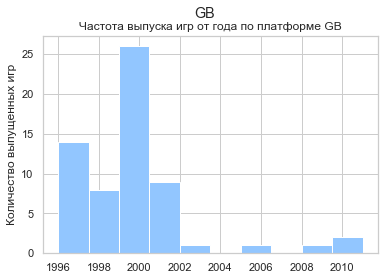

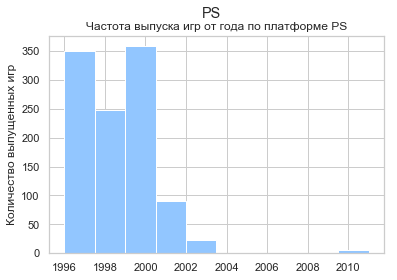

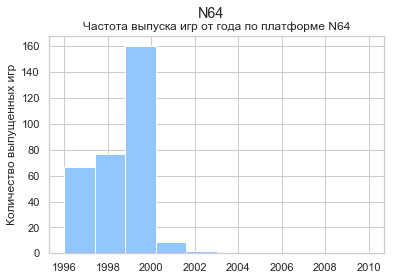

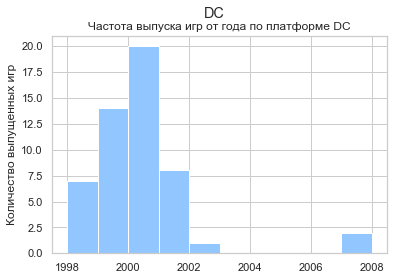

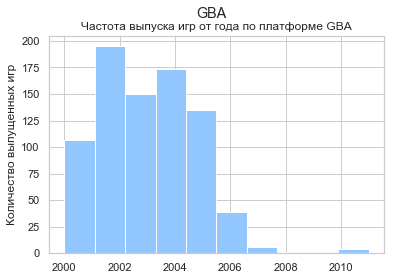

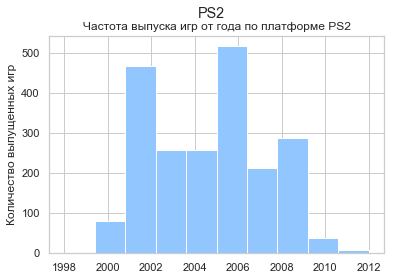

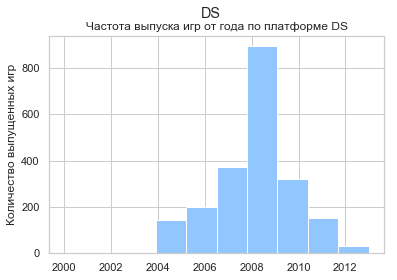

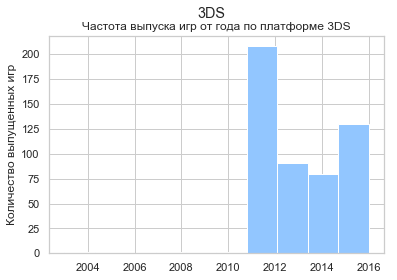

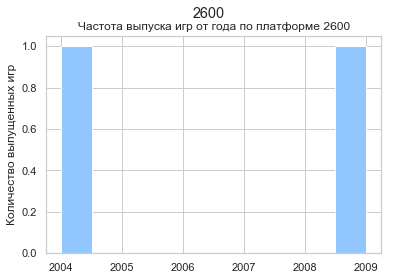

In [28]:
for platform in old_best_platform:
    platform_df = df[df['platform']==platform]
    axes = platform_df.hist('year_of_release')
    plt.suptitle(platform)
    plt.ylabel('Количество выпущенных игр')
    plt.title('Частота выпуска игр от года по платформе {}'.format(platform))

* В GB продолжительность 14 лет
* В PS 7 лет
* В N64 6 лет
* В DC 10 лет
* В GBA 7 лет
* В PS2 11 лет
* В DS 8 лет
* В 3DS 5 лет 
* В 2600 5 лет

In [29]:
print('Средняя продолжительность жизнь игры равна {} лет'.format(round((14+7+6+10+7+11+8+5+5)/9)))

Средняя продолжительность жизнь игры равна 8 лет


Стоит учитывать, что это примерная продолжительность жизнь игры, т.к. возможны выбросы

Определим данные, за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году

Text(0.5, 1.0, 'Частота выпуска игр от года по всем платформам')

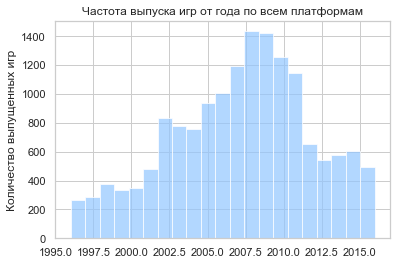

In [30]:
plt.hist(df['year_of_release'],alpha=0.7, bins = 21)
plt.ylabel('Количество выпущенных игр')
plt.title('Частота выпуска игр от года по всем платформам')

На мой взгляд, актуальным периодом является период с 2014 по 2016 год, т.к. консоли 8-ого поколения появидись с 2014-ого года, и чтобы определить потенциально прибыльные платформы надо узнать, какие ещё платформы составили конкуренцию этим консолям. Выберем по три самые продаваемые платформы за 2014, 2015 и 2016 год.

In [31]:
df_old = df[['genre', 'critic_score']].copy() # оставим для последующих шагов
df = df[df['year_of_release'] > 2013]
new_years = df.groupby(['year_of_release', 'platform'],as_index = False)['all_sales'].sum()
new_best_platforms = []
prev = new_years['year_of_release'].max()
n = 3
count = 0
for index, row in new_years.sort_values(['year_of_release', 'all_sales'], ascending = False).iterrows():
    if prev !=  row['year_of_release']:
        count = 0
    prev = row['year_of_release']    
    if count < 3:
        if row['platform'] not in new_best_platforms:
            new_best_platforms.append(row['platform'])
        count = count + 1
new_best_platforms

['PS4', 'XOne', '3DS', 'PS3']

Обратим внимание на другие платформы

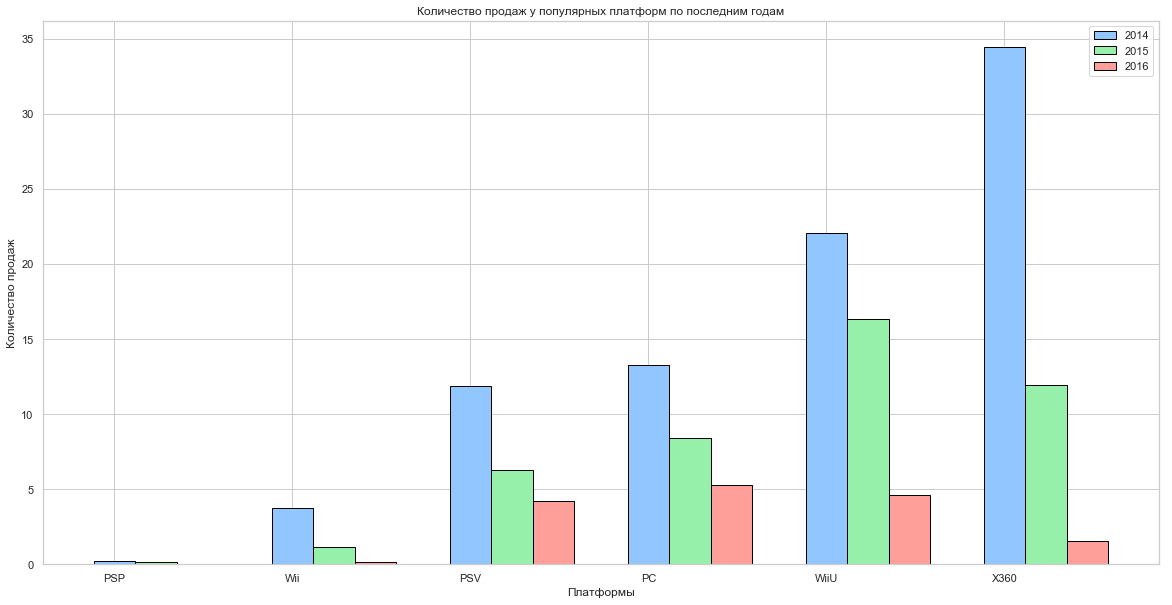

In [32]:
new_years = new_years.query('platform not in @new_best_platforms').sort_values(['year_of_release', 'all_sales'])
new_platform = new_years['platform'].unique()
b = 0
l = []
l_2014 = [0]*len(new_platform)
l_2015 = [0]*len(new_platform)
l_2016 = [0]*len(new_platform)

for index, item in enumerate(new_platform):
    new_l = new_years[new_years['platform']==item].values.tolist()
    if len(new_l) == 3:
        l_2014[index] = new_l[0][2]
        l_2015[index] = new_l[1][2]
        l_2016[index] = new_l[2][2]
    if len(new_l) == 2:
        l_2014[index] = new_l[0][2]
        l_2015[index] = new_l[1][2]
        l_2016[index] = 0

x = np.arange(len(new_platform)) 
width = 0.7

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x, l_2014, width/3, label='2014',ec='black')
rects2 = ax.bar(x + width/3, l_2015, width/3, label='2015', ec='black')
rects3 = ax.bar(x + width/3+width/3, l_2016, width/3, label='2016', ec='black')

ax.set_ylabel('Количество продаж')
ax.set_xlabel('Платформы')
ax.set_title('Количество продаж у популярных платформ по последним годам')
ax.set_xticks(x)
ax.set_xticklabels(new_platform)
ax.legend(['2014', '2015','2016'])

Добавим потенциально прибыльные платформы PC и WiiU, так как видно, что у PC продажи продолжают идти, а у WiiU были хорошие продажи в 2015 году.

In [33]:
new_best_platforms.append('PC')
new_best_platforms.append('WiiU')

In [34]:
# Выделим в список данные о каждой потенциальной прибыльной платформы
l = []
for platform in new_best_platforms:
    l.append(list(df.query('platform == @platform')['all_sales']))
# Из количества игр по каждой платформе найдём максимальное
mx = 0
for i in l:
    mx = max(mx, len(i))
# Уравняем все списки с помощью пустых значений
for i in l:
    for j in range(mx - len(i)):
        i.append(None)
# Приведём список в форму датафрейма
new_l = [[0] * len(l) for i in range(mx)]
for index_out, item_platform in enumerate(l):
    for index_inner, value in enumerate(item_platform):
        if value != None:
            new_l[index_inner][index_out] = float(value)
        else:
            new_l[index_inner][index_out] = value
fd = pd.DataFrame(new_l, columns=new_best_platforms)
fd.head(5)

,PS4,XOne,3DS,PS3,PC,WiiU
0,14.63,7.39,11.68,5.27,3.05,7.09
1,12.62,5.47,7.55,4.36,1.28,4.87
2,8.58,5.26,7.14,4.28,1.19,4.44
3,7.98,4.49,3.89,2.70,1.17,3.21
4,7.66,4.22,3.32,1.74,0.90,1.58


Text(0, 0.5, 'Общие продажи игры')

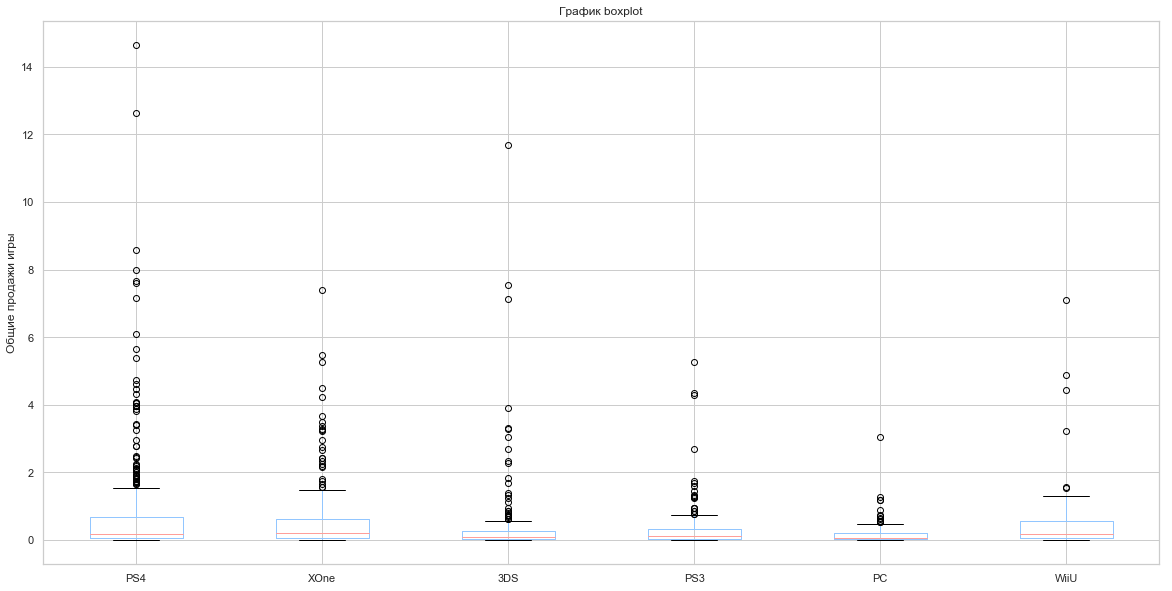

In [35]:
fd.boxplot(figsize=(20,10))
plt.title('График boxplot')
plt.ylabel('Общие продажи игры')

Видим, что у всех платформ кроме PC есть много значений, которые выходят за 1 межквартильных размахов. Это говорит о том, что некоторые игры были сверхуспешными. Приблизим графики, чтобы узнать медиану

Text(0, 0.5, 'Общие продажи игры')

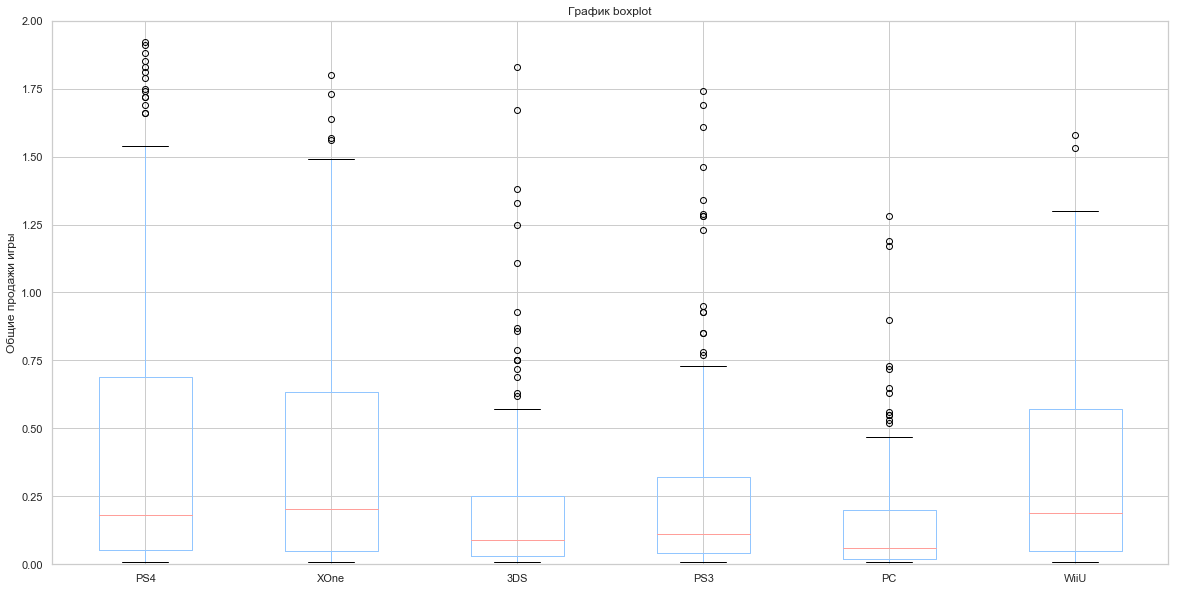

In [36]:
fd.boxplot(figsize=(20,10))
plt.ylim(0, 2)
plt.title('График boxplot')
plt.ylabel('Общие продажи игры')

Результаты сильно отличаются. Например сумма третьего квартиля и полутора межквартильных расстояний у PC не доходит до третьего квартиля XOne, PS4 и WiiU.Также медиана у PC находится ближе к первому квартилю, это говорит о том, что больше половины игр не принесли особой прибыли, это связано, с тем что маломасштабные игра можно легко выпускать на PC. Если сравнить консоли одного поколения PS4 и XOne то видим, что медиана и третье межквартильное расстояние почти одинаковы, т.к. консоли выпускают похожие игры, но иногда одна или другая платформа выпускает эксклюзивы. Исходя из графика можно предположить, что стоимость игр у 3DS и PC меньше чем у других популярных платформ, но это связано с количеством выпущенных игр

Выберем платформу PS4 и посмотрим, как влияют на продажи отзывы пользователей и критиков. Построим диаграмму рассеяния

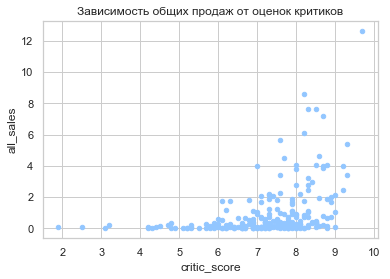

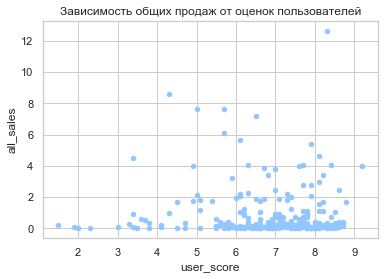

In [37]:
df.reset_index(drop = True, inplace = True)
df['critic_score'] = df['critic_score'] / 10
ps4 = df[df['platform'] == 'PS4']
ps4.plot.scatter(x = 'critic_score', y = 'all_sales', title = 'Зависимость общих продаж от оценок критиков')
ps4.plot.scatter(x = 'user_score', y = 'all_sales', title = 'Зависимость общих продаж от оценок пользователей')

Как видим, большниство игр PS4 получили оценки от 5.5 до 9, но продавались не так хорошо, как некоторые другие игры

Посмотрим есть линейная зависимость у оценок пользователей и критиков от всех продаж  у PS4, XOne и всех платформ

In [38]:
print(ps4['critic_score'].corr(ps4['all_sales']))
ps4['user_score'].corr(ps4['all_sales'])

0.40359412031456066


-0.03877039617798184

In [39]:
xone = df[df['platform'] == 'XOne']
print(xone['critic_score'].corr(xone['all_sales']))
xone['user_score'].corr(xone['all_sales'])

0.4286769437033318


-0.0703839280647581

In [40]:
print(df['critic_score'].corr(df['all_sales']))
df['user_score'].corr(df['all_sales'])

0.32807608812974143


-0.012962002788933944

Как и следовало ожидать, слабая зависимость наблюдается у оценок критиков, т.к. на графике видно, что с ростом оценок увеличиваются общие продажи. Это связано с тем,что при выпуске игры критики сразу ставят оценку и если оценка высокая, то пользователи покупают игру в больших количествах. Также пользователи сколнны к субъективной оценки, а критики оценивают в совокупонсти нескольких параметров в том числе и по общим продажам

Посмотрим на общее распределение игр по жанрам

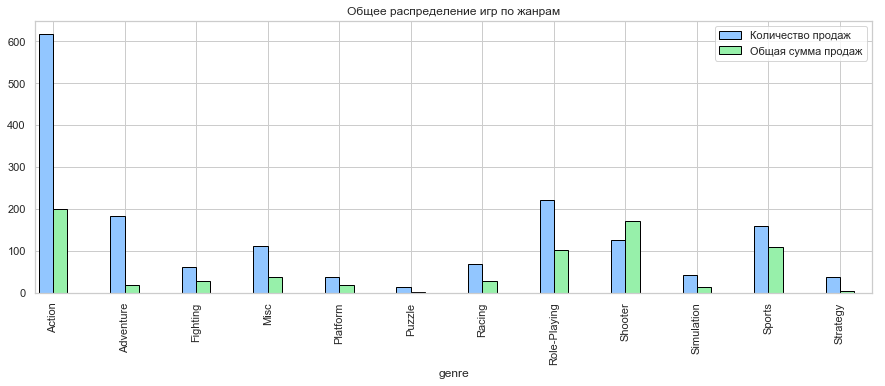

In [41]:
ax = plt.gca()
pivot = df.groupby("genre").agg({'name':'count', 'all_sales': 'sum'})
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1, title = 'Общее распределение игр по жанрам')

plot2 = pivot['all_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Больше всего игр в жанрах Role-Playing  и Action. Меньше всего в паззлах. Больше всего продаж в среднем имеют игры в жанре Shooter, также этот жанр имеет больше продаж в соотношении с количеством продаж по отошению к другим жанрам 

Таким образом:
* Игры существенно начали оценивать только с 1996 года
* Популярные в прошлом платформы, у которых сейчас продажи на нуле: GB, PS, N64, DC, GBA, PS2, DS, 2600
* Потенциально прибыльные платформы: PS4, XOne, 3DS, PS3, PC, WiiU
* Cлабая линейная зависимость наблюдается у общих продаж от оценок критиков по платформе PS4 в играх, выпущенных с 2014-ого года. Зависимости общих продаж от пользовательских оценок не наблюдается

<a name="stage_5"></a>
# Шаг 5. Составление портрета пользователя каждого региона

Определим для пользователя Северной Америки, Европы и Японии самые популярные платформы и самые популярные жанры

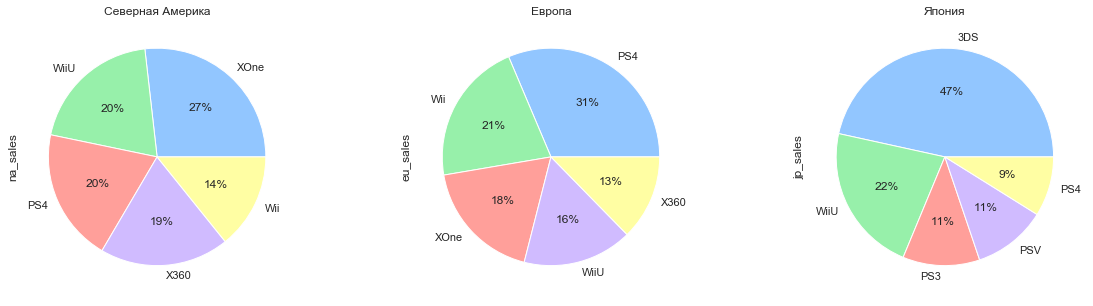

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(40,6))
na = df.groupby('platform')['na_sales'].mean().sort_values(ascending = False).head(5)
na = na/na.sum()
plot = na.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[0], title = 'Северная Америка')

eu = df.groupby('platform')['eu_sales'].mean().sort_values(ascending = False).head(5)
eu =eu/eu.sum()
plot = eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[1], title ='Европа')

jp = df.groupby('platform')['jp_sales'].mean().sort_values(ascending = False).head(5)
jp = jp/jp.sum()
plot = jp.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[2], title = 'Япония')

Жители Северной Америки и Европы предпочитают консоли 8-ого поколения. Жители Японии больше пользуются 3DS, WiiU и PS3. Заметим, что 3DS и WiiU производит японская компания Nintendo

Самые популярные жанры

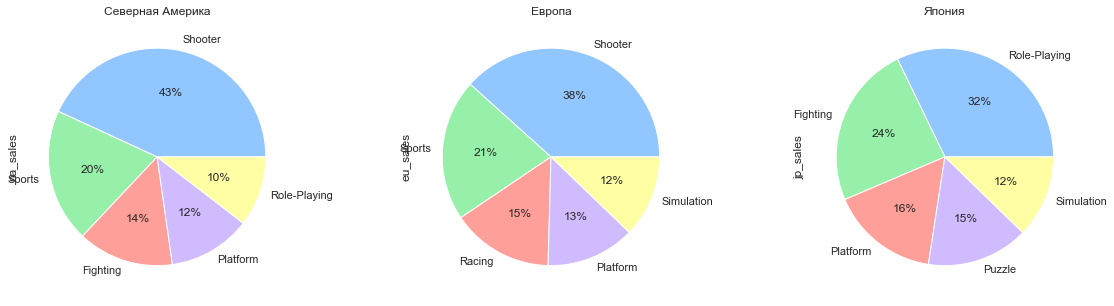

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(40,6))
na = df.groupby('genre')['na_sales'].mean().sort_values(ascending = False).head(5)
na = na/na.sum()
na.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[0], title = 'Северная Америка')

eu = df.groupby('genre')['eu_sales'].mean().sort_values(ascending = False).head(5)
eu =eu/eu.sum()
eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[1], title ='Европа')

jp = df.groupby('genre')['jp_sales'].mean().sort_values(ascending = False).head(5)
jp = jp/jp.sum()
jp.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 5), legend=False, ax=axes[2], title = 'Япония')

Для Северной Америки больший интерес представляют Shooter и жанры активных игр, таких как спорт и файтинг. Похожие характеристики имеют пользователи из Европы, только вместо файтинга больший интерес представляют гонки. Жители Японии больше предпочитают ролевые игры. Также выделяется жанр паззлы. Возможно, это связано с большой вовлечённостью жителей Японии к аниме.

Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе

In [44]:
df.groupby('rating')['na_sales'].mean().sort_values(ascending = False).head(5)

rating
M       0.367176
E       0.232615
E10+    0.180435
T       0.143727
Name: na_sales, dtype: float64

In [45]:
df.groupby('rating')['eu_sales'].mean().sort_values(ascending = False).head(5)

rating
M       0.355573
E       0.265138
E10+    0.141848
T       0.125720
Name: eu_sales, dtype: float64

In [46]:
df.groupby('rating')['jp_sales'].mean().sort_values(ascending = False).head(5)

rating
T       0.054539
E       0.041009
M       0.030496
E10+    0.024239
Name: jp_sales, dtype: float64

Визуализируем полученные данные

[Text(0, 0.5, 'Cредняя продажа по рейтингу')]

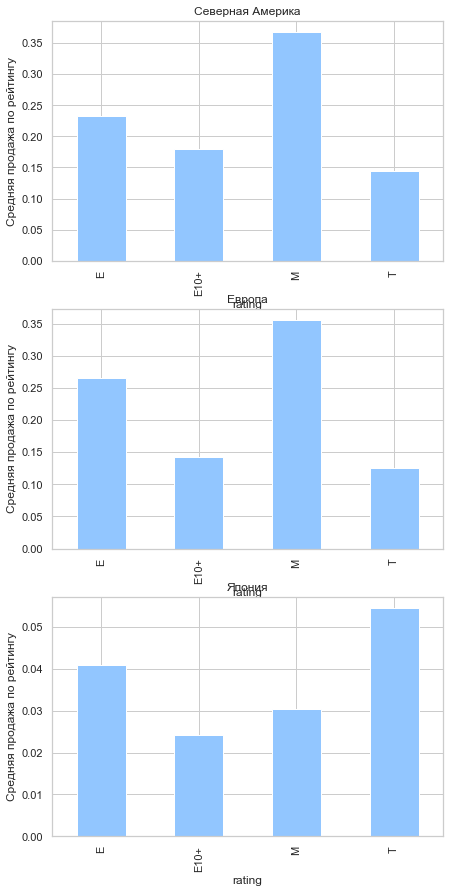

In [47]:
fig, axes = plt.subplots(3, figsize=(7,15))
na = df.groupby('rating')['na_sales'].mean().head(5)
na.plot(kind='bar', legend=False, title = 'Северная Америка', ax=axes[0]).set(ylabel ='Cредняя продажа по рейтингу')

eu = df.groupby('rating')['eu_sales'].mean().head(5)
eu.plot(kind='bar',  legend=False, title ='Европа', ax=axes[1]).set(ylabel ='Cредняя продажа по рейтингу')

jp = df.groupby('rating')['jp_sales'].mean().head(5)
jp.plot(kind='bar',  legend=False,  title = 'Япония',ax=axes[2]).set(ylabel ='Cредняя продажа по рейтингу')

Видим, что игры, относящиеся к рейтингу M, означающий "для взрослых", в Северной Америке и Европе имеют самые большие продажи, в то время в Японии игры этого рейтинга имеют в 12 раз меньше средних продаж

<a name="stage_6"></a>
# Шаг 6. Исследование статистических показателей

Узнаем, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах. Посчитаем среднее количество, дисперсию и стандартное отклонение

In [48]:
df.groupby('genre')['critic_score'].agg(['mean', 'std', 'var'])

,mean,std,var
genre,,,
Action,7.025217,1.214278,1.474470
Adventure,7.271429,1.014185,1.028571
Fighting,7.041935,1.015143,1.030516
Misc,7.406250,0.932197,0.868992
Platform,7.629630,1.197374,1.433704
Puzzle,7.725000,0.884590,0.782500
Racing,7.170213,0.982215,0.964746
Role-Playing,7.452577,1.174121,1.378561
Shooter,7.590909,1.035867,1.073020


In [49]:
df.groupby('genre')['user_score'].agg(['mean', 'std', 'var'])

,mean,std,var
genre,,,
Action,6.756757,1.378585,1.900497
Adventure,7.470213,1.253329,1.570833
Fighting,6.983784,1.348356,1.818063
Misc,6.965000,1.275921,1.627974
Platform,6.741379,1.789556,3.202512
Puzzle,7.975000,0.613052,0.375833
Racing,6.327451,1.590104,2.528431
Role-Playing,7.348571,1.317567,1.735984
Shooter,6.538679,1.384717,1.917442


Видим, что среднее значение оценки пользователей чаще меньше значения 7, чем у оценок критиков. Также среднеквадратическое отклонение больше у оценок пользователкй чем у критиков, т.к. пользователи склонны к характерным значениям оценок

Построим гистограммы частоты оценок критиков для каждого жанра

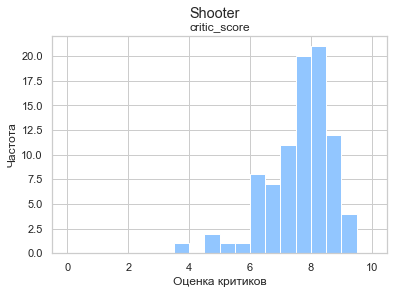

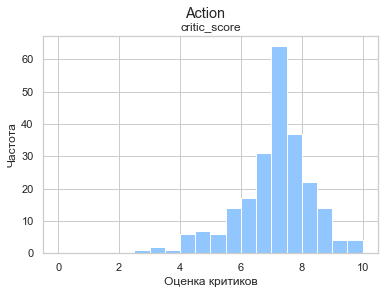

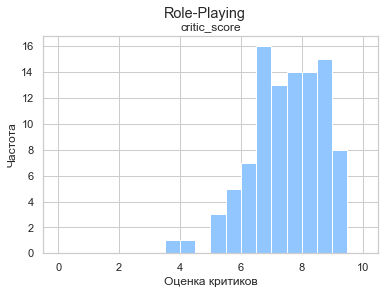

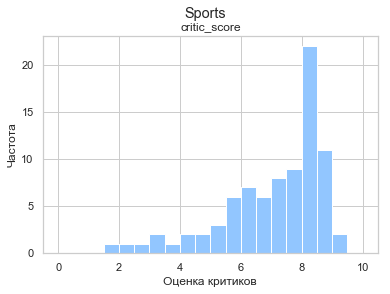

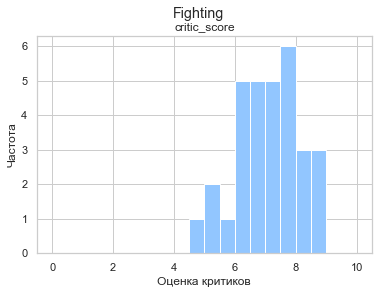

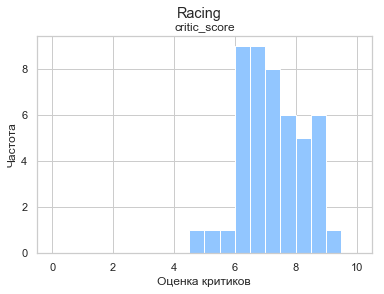

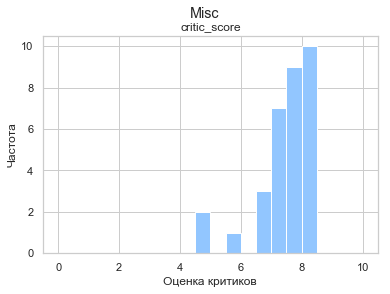

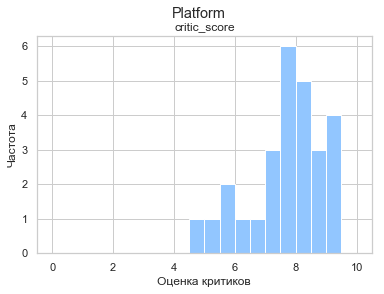

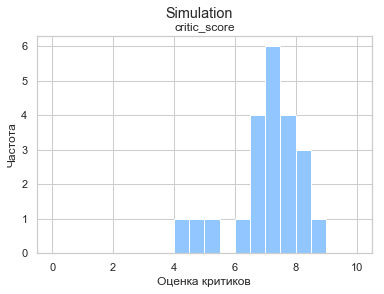

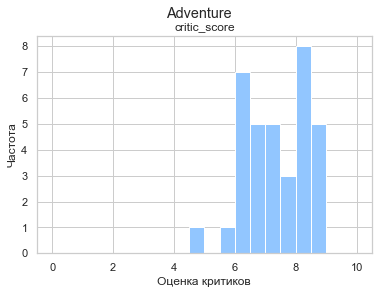

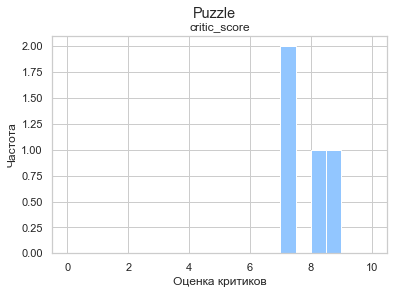

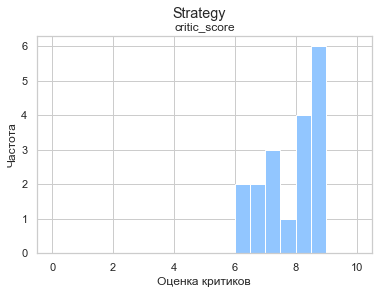

In [50]:
for genre in df['genre'].unique():
    axes = df[df['genre'] == genre].hist('critic_score',  range=[0, 10], bins = 20)
    plt.suptitle(genre)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Частота')    

Видно, что в жанрах Shooter и Action наблюдается нормальное распределение. Про другие жанры такой вывод нельзя сделать. В целом имеем мало наблюдений, вернём данные с 1996-ого года и построим гистограммы

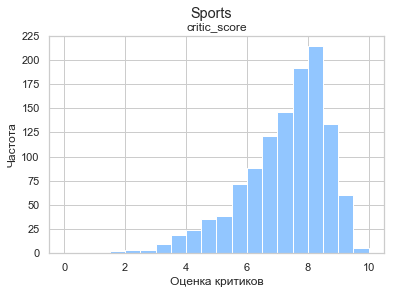

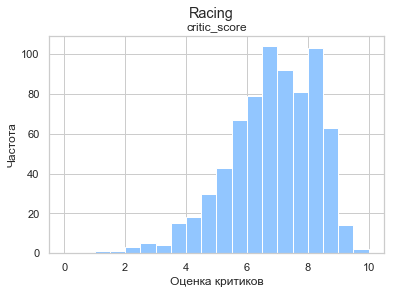

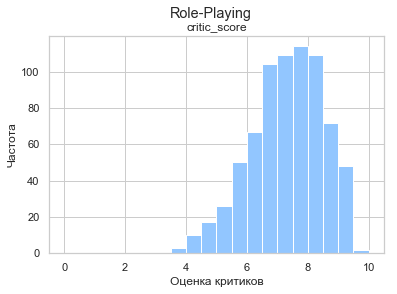

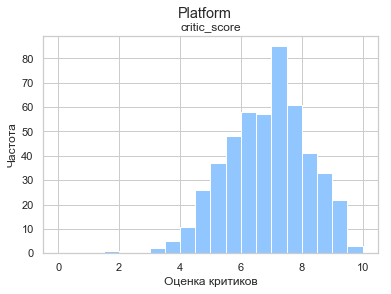

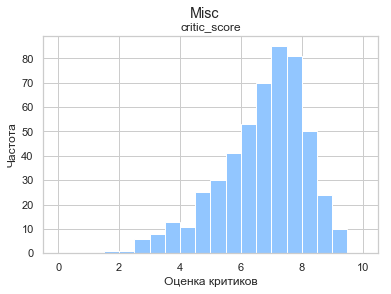

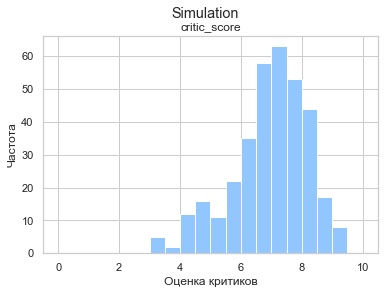

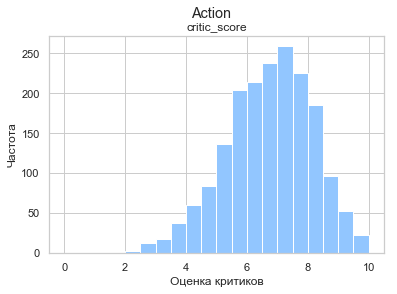

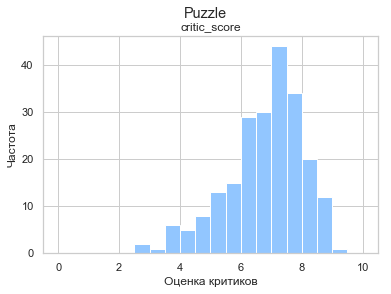

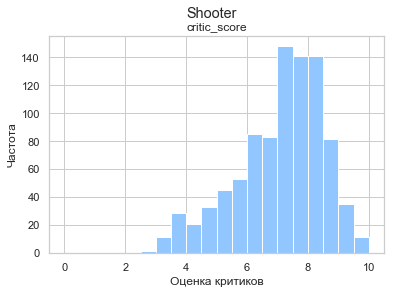

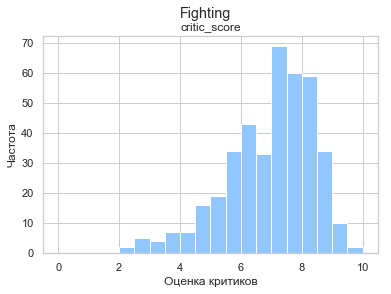

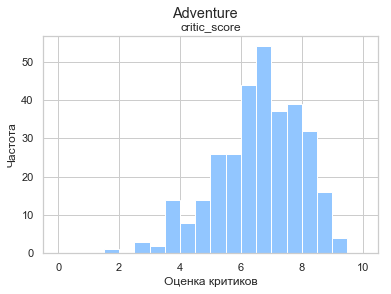

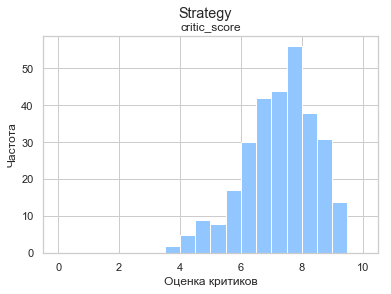

In [51]:
df_old['critic_score'] = df_old['critic_score'] / 10
for genre in df_old['genre'].unique():
    axes = df_old[df_old['genre'] == genre].hist('critic_score',  range=[0, 10], bins = 20)
    plt.suptitle(genre)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Частота') 

 Распределения скошены влево (отрицательно ассиметричные), т.к. средние значения находятся в районе семи, а выше семи не так много игр 

<a name="stage_7"></a>
# Шаг 7. Проверка гипотез

Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Воспользуемся Т-критерием, который формирует двусторонний тест для нулевой гипотезы о том, что 2 независимые генеральные совокупности имеют идентичные средние(ожидаемые) значения, т.к. этот тест предполагает, что выборки имеют идентичные отклонения.
Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [52]:
user_score_xone = list(df[df['platform'] == 'XOne']['user_score'].dropna())
user_score_pc = list(df[df['platform'] == 'PC']['user_score'].dropna())

alpha = 0.05

results = st.ttest_ind(user_score_xone, user_score_pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11177153038147045
Не получилось отвергнуть нулевую гипотезу


p-значение: 0.111, это означает, что мы  достигли минимум 95% вероятности того, чтобы сказать, что нельзя отвергнуть, того что средние пользовательские рейтинги платформ Xbox One и PC равны

Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны

In [53]:
user_score_action = list(df[df['genre'] == 'Action']['user_score'].dropna())
user_score_sports = list(df[df['genre'] == 'Sports']['user_score'].dropna())

alpha = 0.05

results = st.ttest_ind(user_score_action, user_score_sports)
print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.206582013343293e-19
Отвергаем нулевую гипотезу


p-значение: 4.2*10^-19, это означает, что мы  не достигли минимум 95% вероятности того, чтобы сказать, что средние пользовательские рейтинги жанров Action и Sports равны.
Подтверждаем гипотезу: средние пользовательские рейтинги жанров Action и Sports разные

<a name="stage_8"></a>
# Шаг 8. Общий вывод

В данной работе, можно сделать много различных выводов. Самые интересные из них следующие:
* Игры существенно начали оценивать только с 1996 года
* Популярные в прошлом платформы, у которых сейчас продажи на нуле: GB, PS, N64, DC, GBA, PS2, DS, 2600
* Потенциально прибыльные платформы: PS4, XOne, 3DS, PS3, PC, WiiU
* Cлабая линейная зависимость наблюдается у общих продаж от оценок критиков по платформе PS4 в играх, выпущенных с 2014-ого года. Зависимости общих продаж от пользовательских оценок не наблюдается
* Жители Северной Америки и Европы предпочитают консоли PS4 и Xbox One. Жители Японии больше пользуются 3DS, WiiU и PS3
* Для Северной Америки больший интерес представляют Shooter и жанры активных игр, таких как спорт и файтинг
* Жители Японии больше всего предпочитают ролевые игры
* Нельзя отвергнуть, что средние пользовательские рейтинги платформ Xbox One и PC равны
* Средние пользовательские рейтинги жанров Action и Sports разные